In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy
from scipy.stats import levene
from scipy.stats import kstest, norm
from scipy.stats import ks_2samp
from scipy.stats import f_oneway


In [ ]:
data = pd.read_csv('/content/movieReplicationSet.csv')
data

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [ ]:
ratings_count = data.iloc[:, 0:400].count()
ratings_count.sort_values()

Best Laid Plans (1999)         54
The Final Conflict (1981)      55
FeardotCom (2002)              56
Sexy Beast (2000)              56
Stir Crazy (1980)              59
                             ... 
Monsters  Inc.(2001)          927
The Lion King (1994)          937
Shrek 2 (2004)                965
Shrek (2001)                 1008
Finding Nemo (2003)          1014
Length: 400, dtype: int64

In [ ]:
#automatically deals with null values by reomving them from calculation
average_ratings = data.iloc[:, 0:400].mean(axis=0)
average_ratings

The Life of David Gale (2003)                2.151316
Wing Commander (1999)                        2.021127
Django Unchained (2012)                      3.153422
Alien (1979)                                 2.707612
Indiana Jones and the Last Crusade (1989)    2.778618
                                               ...   
Patton (1970)                                2.278689
Anaconda (1997)                              2.295455
Twister (1996)                               2.402299
MacArthur (1977)                             2.114754
Look Who's Talking (1989)                    2.337963
Length: 400, dtype: float64

In [ ]:
ratings_count_df = pd.DataFrame({'Movie Name': ratings_count.index, 'ratings_count': ratings_count})
# Create a DataFrame for average_ratings with the movie names as the index
average_ratings_df = pd.DataFrame({'Movie Name': average_ratings.index, 'average_rating': average_ratings})
# Merge the two DataFrames based on the 'Movie Name' column
df = pd.merge(ratings_count_df, average_ratings_df, on='Movie Name')
df = df.sort_values(by="ratings_count")
df

,Movie Name,ratings_count,average_rating
249,Best Laid Plans (1999),54,2.046296
334,The Final Conflict (1981),55,2.309091
346,FeardotCom (2002),56,2.205357
109,Sexy Beast (2000),56,2.232143
133,Stir Crazy (1980),59,2.194915
...,...,...,...
267,Monsters Inc.(2001),927,3.352211
220,The Lion King (1994),937,3.459979
57,Shrek 2 (2004),965,2.825907
87,Shrek (2001),1008,3.133929


# Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular?


In [ ]:
median_ratings_count = df['ratings_count'].median()
median_ratings_count

197.5

In [ ]:
# pivot_table = data.iloc[:, 0:400].transpose()
high_popularity_movies = df[df['ratings_count'] >= median_ratings_count]
low_popularity_movies = df[df['ratings_count'] < median_ratings_count]

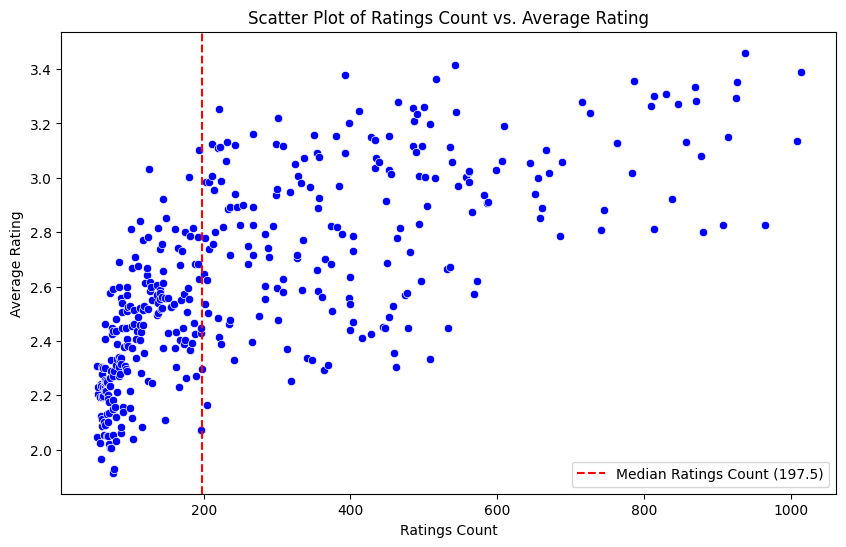

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ratings_count', y='average_rating', color='blue')
plt.xlabel("Ratings Count")
plt.ylabel("Average Rating")
plt.title("Scatter Plot of Ratings Count vs. Average Rating")
plt.axvline(x=median_ratings_count, color='red', linestyle='--', label=f'Median Ratings Count ({median_ratings_count})')
plt.legend()
plt.show()

In [ ]:
group1 = df[df['ratings_count'] >= median_ratings_count]['average_rating']
group2 = df[df['ratings_count'] < median_ratings_count]['average_rating']


In [ ]:
#to check if the variances are differnt
statistic, p_value = levene(group1, group2)

# Print the results
print(f"Levene's Test - Test Statistic: {statistic}, p-value: {p_value}")

Levene's Test - Test Statistic: 12.924660098096007, p-value: 0.0003650086478858589


(array([15., 32., 58., 69., 62., 49., 33., 49., 24.,  9.]),
 array([1.91558442, 2.07002384, 2.22446326, 2.37890269, 2.53334211,
        2.68778154, 2.84222096, 2.99666038, 3.15109981, 3.30553923,
        3.45997866]),
 <BarContainer object of 10 artists>)

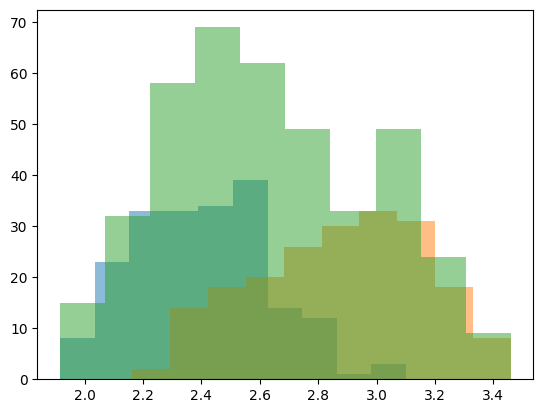

In [ ]:
plt.hist(group2, alpha=0.5)
plt.hist(group1, alpha = 0.5)
plt.hist(df['average_rating'], alpha=0.5)

In [ ]:
# Perform the 2-sample t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
alpha = 0.005
if p_value < alpha:
    print("High popularity movies have significantly higher average ratings.")
else:
    print("There is no significant difference in average ratings between high and low popularity movies.")

T-Statistic: 17.756049269873714
P-Value: 9.536936590851552e-52
High popularity movies have significantly higher average ratings.


In [ ]:
group2.describe()

count    200.000000
mean       2.400923
std        0.231469
min        1.915584
25%        2.233036
50%        2.402042
75%        2.555871
max        3.101036
Name: average_rating, dtype: float64

In [ ]:
df['average_rating'].describe()

count    400.000000
mean       2.634619
std        0.351948
min        1.915584
25%        2.363441
50%        2.581923
75%        2.915708
max        3.459979
Name: average_rating, dtype: float64

In [ ]:
group1.describe()
# np.describe(group2)

count    200.000000
mean       2.868316
std        0.291552
min        2.164216
25%        2.643825
50%        2.897328
75%        3.097573
max        3.459979
Name: average_rating, dtype: float64

In [ ]:
movie_list = []
year_list =[]
for movie in (data.iloc[:, 0:400].columns):
    match = re.search(r'\((\d{4})\)$', movie)
    year = match.group(1)
    movie_list.append(movie)
    year_list.append(year)

In [ ]:
year_df = pd.DataFrame({'Movie Name': movie_list, 'year': year_list})
q2_df = pd.merge(year_df, average_ratings_df, on='Movie Name')
q2_df = q2_df.sort_values(by="year")
q2_df

,Movie Name,year,average_rating
17,Psycho (1960),1960,2.925770
122,The Good the Bad and the Ugly (1966),1966,2.787293
135,The Silencers (1966),1966,2.230769
162,Who's Afraid of Virginia Woolf (1966),1966,2.642276
268,Thoroughly Modern Millie (1967),1967,2.372549
...,...,...,...
371,Captain America: Civil War (2016),2016,3.058550
259,Ouija: Origin of Evil (2016),2016,2.073604
225,Split (2016),2016,2.936455
319,La La Land (2016),2016,3.003584


In [ ]:
median_year = q2_df['year'].median()
median_year = median_year.astype(int)

In [ ]:
q2_df['year'] = q2_df['year'].astype(int)

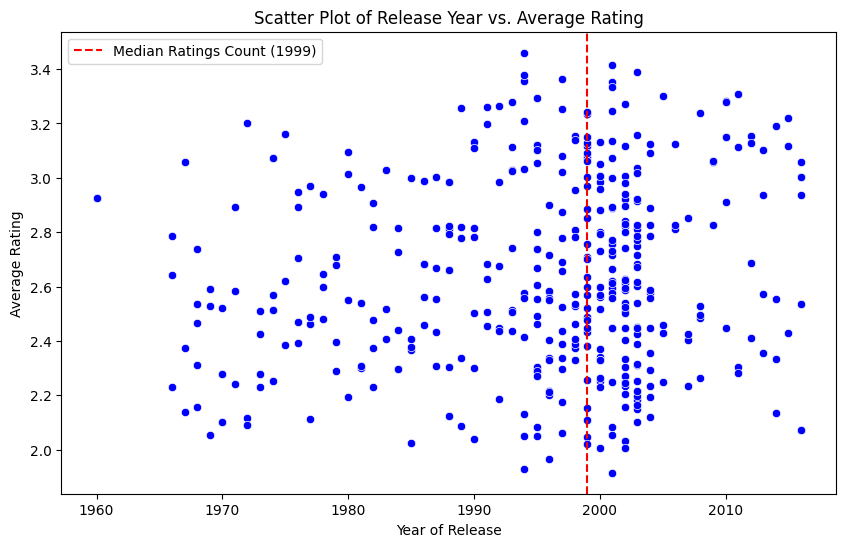

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=q2_df, x='year', y='average_rating', color='blue')
plt.xlabel("Year of Release")
plt.ylabel("Average Rating")
plt.title("Scatter Plot of Release Year vs. Average Rating")
plt.axvline(x=median_year, color='red', linestyle='--', label=f'Median Ratings Count ({median_year})')
plt.legend()
plt.show()

In [ ]:
group1 = q2_df[q2_df['year'] >= median_year]['average_rating']
group2 = q2_df[q2_df['year'] < median_year]['average_rating']
#to check if the variances are differnt
statistic, p_value = levene(group1, group2)

# Print the results
print(f"Levene's Test - Test Statistic: {statistic}, p-value: {p_value}")

Levene's Test - Test Statistic: 1.6620802393442529, p-value: 0.1980714428132103


In [ ]:
# Perform the K-S test against a normal distribution
D, p_value = kstest(group1, 'norm')

print(f"K-S statistic: {D}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

K-S statistic: 0.9726861069324244
P-value: 7.707296e-318
Sample does not look Gaussian (reject H0)


(array([ 7., 14., 29., 26., 30., 23., 23., 23., 19.,  9.]),
 array([1.91558442, 2.06544664, 2.21530886, 2.36517108, 2.51503331,
        2.66489553, 2.81475775, 2.96461997, 3.1144822 , 3.26434442,
        3.41420664]),
 <BarContainer object of 10 artists>)

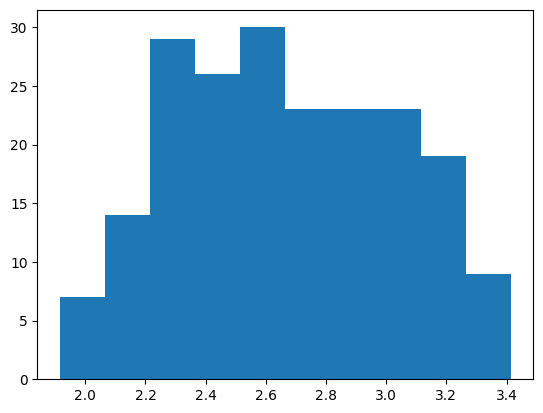

In [ ]:
plt.hist(group1)

In [ ]:
# Perform the 2-sample t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=True)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
alpha = 0.005
if p_value < alpha:
    print("High popularity movies have significantly higher average ratings.")
else:
    print("There is no significant difference in average ratings between older and newer movies.")

T-Statistic: 1.605479609469516
P-Value: 0.1091814139798191
There is no significant difference in average ratings between older and newer movies.


In [ ]:
shrek_df = data[['Shrek (2001)','Gender identity (1 = female; 2 = male; 3 = self-described)']]

In [ ]:
mean_rating = shrek_df['Shrek (2001)'].mean()
mean_rating

3.1339285714285716

In [ ]:
shrek_f_df=shrek_df[shrek_df['Gender identity (1 = female; 2 = male; 3 = self-described)']==1.0]
shrek_m_df=shrek_df[shrek_df['Gender identity (1 = female; 2 = male; 3 = self-described)']==2.0]

In [ ]:
group1 = shrek_f_df['Shrek (2001)'].dropna()
group2 = shrek_m_df['Shrek (2001)'].dropna()

#to check if the variances are differnt
statistic, p_value = levene(group1, group2)

# Print the results
print(f"Levene's Test - Test Statistic: {statistic}, p-value: {p_value}")

Levene's Test - Test Statistic: 0.44722614898750407, p-value: 0.503812335250825


In [ ]:
mean_group1 = np.mean(group1)
std_group1 = np.std(group1)
D, p_value_1 = kstest(group1, 'norm', args=(mean_group1, std_group1))

mean_group2 = np.mean(group2)
std_group2 = np.std(group2)
D, p_value_2 = kstest(group2, 'norm', args=(mean_group2, std_group2))


In [ ]:
# our data is not normally distributed
statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

# Print the results
print("Mann-Whitney U Statistic:", statistic)
print("p-value:", p_value)


Mann-Whitney U Statistic: 96830.5
p-value: 0.050536625925559006


In [ ]:
# since the p-value > alpha, there is no signifcant difference between the male and female ratings

In [ ]:
q5_df = data[['The Lion King (1994)','Are you an only child? (1: Yes; 0: No; -1: Did not respond)']]
only_child = q5_df[q5_df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']==1]
have_siblings = q5_df[q5_df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']==0]
group1 = only_child['The Lion King (1994)'].dropna()
group2 = have_siblings['The Lion King (1994)'].dropna()

In [ ]:
only_child['The Lion King (1994)'].mean()

3.347682119205298

In [ ]:
have_siblings['The Lion King (1994)'].mean()

3.481958762886598

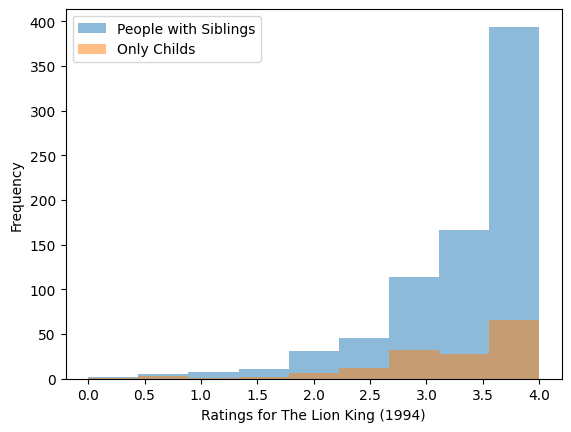

In [ ]:

plt.hist(group2,bins =9, alpha=0.5, label='People with Siblings', density=False)
plt.hist(group1,bins=9, alpha=0.5, label='Only Childs', density=False)

# Adding labels and title
plt.xlabel('Ratings for The Lion King (1994)')     # Label for x-axis
plt.ylabel('Frequency')        # Label for y-axis


# Adding legend to differentiate between Group 1 and Group 2
plt.legend(loc='upper left')  # 'loc' parameter specifies the location of the legend

plt.show()  # Display the plot

In [ ]:
#since the data is not normally distributed
statistic, p_value = mannwhitneyu(group1, group2, alternative='greater')

# Print the results
print("Mann-Whitney U Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results based on the p-value and your significance level (e.g., 0.05)
if p_value < alpha:
    print("People with no siblings enjoy the movie more.")
else:
    print("People with no siblings do not enjoy the movie more.")


Mann-Whitney U Statistic: 52929.0
p-value: 0.978419092554931
People with no siblings do not enjoy the movie more.


In [ ]:
count_different_ratings = 0
count = 0
norm_count =0
not_norm_count =0
for i in range(1, 401):  # Columns 1-400 are movie ratings
    # Extract ratings for the current movie
    child = data.iloc[:, i-1]

    # Extract ratings based on gender
    only_child = child[data['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1].dropna()
    have_siblings = child[data['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0].dropna()

    # Compute the mean and standard deviation of the data
    only_child_mean = np.mean(only_child)
    only_child_std = np.std(only_child)
    # Perform the KS test
    # The 'cdf' parameter is set to 'norm' which stands for the normal distribution.
    # The 'args' parameter receives the parameters of the distribution, in this case, the mean and std of the data.
    D, p_value_only_child = kstest(only_child, 'norm', args=(only_child_mean, only_child_std))

    have_siblings_mean = np.mean(have_siblings)
    have_siblings_std = np.std(have_siblings)
    D, p_value_have_siblings = kstest(have_siblings, 'norm', args=(have_siblings_mean, have_siblings_std))

    alpha = 0.005
    if p_value_only_child > alpha and p_value_have_siblings > alpha: #null hypothesis: data is normally distributed
      norm_count +=1
      count +=1
      # Perform t-test
      statistic, p_value_var = levene(only_child, have_siblings)
      if p_value_var < alpha:
        t_stat, p_val_ttest = ttest_ind(only_child, have_siblings, equal_var=False)
        # Check if p-value is less than 0.005
        if p_val_ttest < alpha:
            count_different_ratings += 1
      else:
        t_stat, p_val_ttest = ttest_ind(only_child, have_siblings, equal_var=True)
        # Check if p-value is less than 0.005
        if p_val_ttest < alpha:
            count_different_ratings += 1
    else: #data is not normally distributed
      not_norm_count +=1
      statistic, p_value_mw = mannwhitneyu(only_child, have_siblings, alternative='two-sided')
      if p_value_mw < alpha:
        count_different_ratings += 1
prop = count_different_ratings/400
prop

0.0175

In [ ]:
q7_df = data[['The Wolf of Wall Street (2013)','Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']]
social = q7_df[q7_df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']==0]
alone = q7_df[q7_df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']==1]
group1 = social['The Wolf of Wall Street (2013)'].dropna()
group2 = alone['The Wolf of Wall Street (2013)'].dropna()

In [ ]:
statistic, p_value = levene(group1, group2)
print(group1.mean())
print(group2.mean())
# Print the results
print(f"Levene's Test - Test Statistic: {statistic}, p-value: {p_value}")

3.033333333333333
3.143765903307888
Levene's Test - Test Statistic: 0.80550320152209, p-value: 0.369779852094133


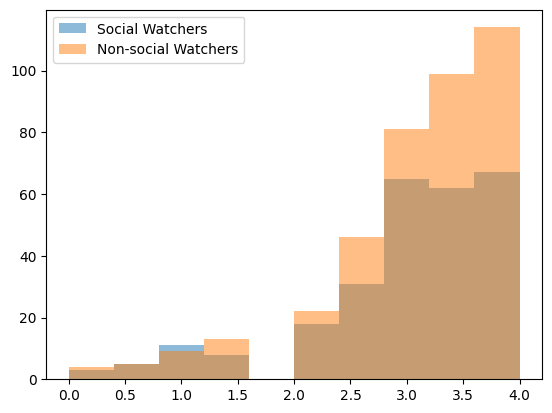

In [ ]:
#data has equal variance

#we check if the data is normal
plt.hist(group1, alpha = 0.5, label='Social Watchers')
plt.hist(group2, alpha = 0.5, label='Non-social Watchers')
plt.legend()

In [ ]:
#since the data is not normal
statistic, p_value = mannwhitneyu(group1, group2, alternative='greater')

# Print the results
print("Mann-Whitney U Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results based on the p-value and your significance level (e.g., 0.05)
if p_value < alpha:
    print("People who like to watch movies socially enjoy the movie more.")
else:
    print("People who like to watch movies socially do not enjoy the movie more than those who like to watch it alone.")

Mann-Whitney U Statistic: 49303.5
p-value: 0.9436657996253056
People who like to watch movies socially do not enjoy the movie more than those who like to watch it alone.


In [ ]:
count_different_ratings = 0
count = 0
norm_count =0
not_norm_count =0
for i in range(1, 401):  # Columns 1-400 are movie ratings
    # Extract ratings for the current movie
    temp = data.iloc[:, i-1]

    social = temp[data['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0].dropna()
    alone = temp[data['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1].dropna()

    # Compute the mean and standard deviation of the data
    social_mean = np.mean(social)
    social_std = np.std(social)
    # Perform the KS test
    # The 'cdf' parameter is set to 'norm' which stands for the normal distribution.
    # The 'args' parameter receives the parameters of the distribution, in this case, the mean and std of the data.
    D, p_value_social = kstest(social, 'norm', args=(social_mean, social_std))

    alone_mean = np.mean(alone)
    alone_std = np.std(alone)
    D, p_value_alone = kstest(alone, 'norm', args=(alone_mean, alone_std))

    alpha = 0.005
    if p_value_social > alpha and p_value_alone > alpha: #null hypothesis: data is normally distributed
      norm_count +=1
      count +=1
      # Perform t-test
      statistic, p_value_var = levene(social, alone)
      if p_value_var < alpha:
        t_stat, p_val_ttest = ttest_ind(social, alone, equal_var=False)
        if p_val_ttest < alpha:
            count_different_ratings += 1
      else:
        t_stat, p_val_ttest = ttest_ind(social, alone, equal_var=True)
        if p_val_ttest < alpha:
            count_different_ratings += 1


    else: #data is not normally distributed
      not_norm_count +=1
      statistic, p_value_mw = mannwhitneyu(social, alone, alternative='greater')
      if p_value_mw < alpha:
        count_different_ratings += 1
prop = count_different_ratings/400
prop

0.015

In [ ]:
q9_df = data[['Home Alone (1990)','Finding Nemo (2003)']]
group1 = q9_df['Home Alone (1990)'].dropna()
group2 = q9_df['Finding Nemo (2003)'].dropna()
statistic, p_value = levene(group1, group2)
print(f"Levene's Test - Test Statistic: {statistic}, p-value: {p_value}")

Levene's Test - Test Statistic: 22.77900804511693, p-value: 1.9585675233986592e-06


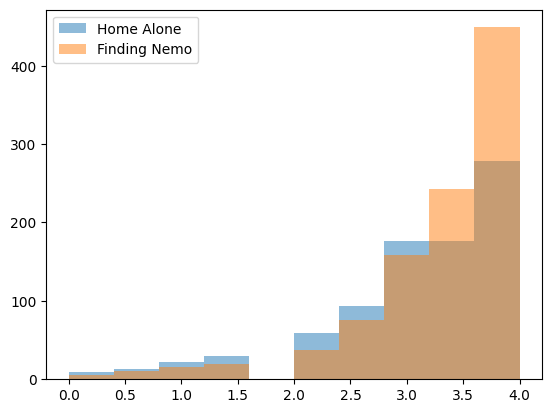

In [ ]:
plt.hist(group1, alpha=0.5, label='Home Alone')
plt.hist(group2, alpha=0.5, label = 'Finding Nemo')
plt.legend()

In [ ]:
statistic, p_value = ks_2samp(group1, group2)

# Print the results
print("KS Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results based on the p-value and your significance level (e.g., 0.05)
if p_value < alpha:
    print("There is evidence of a significant difference between the two samples' distributions.")
else:
    print("There is no evidence of a significant difference between the two samples' distributions.")

KS Statistic: 0.15269080020897632
p-value: 6.379397182836346e-10
There is evidence of a significant difference between the two samples' distributions.


F-statistic: 19.050958699528884
p-value: 5.20425425762115e-12
There is evidence of a significant difference among at least one pair of groups.


In [ ]:
franchise_list = ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']
# Convert the list to a string representation
franchise_list = [re.escape(movie) for movie in franchise_list]
for movie in franchise_list:
  selected_columns = data.columns[data.columns.str.contains(movie)]
  selected_data = data[selected_columns]
  selected_data = selected_data.dropna() #if any row has a null value, drop the row

  f_statistic, p_value = f_oneway(*[selected_data[column] for column in selected_data.columns])

  # # Print the results
  # print("F-statistic:", f_statistic)
  # print("p-value:", p_value)

  # Interpret the results based on the p-value and your chosen significance level (e.g., 0.05)
  if p_value < alpha:
      print(f"There is evidence of a significant difference among at least one pair of groups for {movie}.")
  else:
      print(f"There is no evidence of a significant difference among the groups for {movie}.")

There is evidence of a significant difference among at least one pair of groups for Star\ Wars.
There is no evidence of a significant difference among the groups for Harry\ Potter.
There is evidence of a significant difference among at least one pair of groups for The\ Matrix.
There is evidence of a significant difference among at least one pair of groups for Indiana\ Jones.
There is evidence of a significant difference among at least one pair of groups for Jurassic\ Park.
There is no evidence of a significant difference among the groups for Pirates\ of\ the\ Caribbean.
There is evidence of a significant difference among at least one pair of groups for Toy\ Story.
There is evidence of a significant difference among at least one pair of groups for Batman.


# Proportion different


In [ ]:
count_different_ratings = 0

In [ ]:
count = 0
for i in range(1, 401):  # Columns 1-400 are movie ratings
    # Extract ratings for the current movie
    movie_ratings = data.iloc[:, i-1]

    # Extract ratings based on gender
    male_ratings = movie_ratings[data['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2.0].dropna()
    female_ratings = movie_ratings[data['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1.0].dropna()

    # Compute the mean and standard deviation of the data
    male_mean = np.mean(male_ratings)
    male_std = np.std(male_ratings)
    # Perform the KS test
    # The 'cdf' parameter is set to 'norm' which stands for the normal distribution.
    # The 'args' parameter receives the parameters of the distribution, in this case, the mean and std of the data.
    D, p_value_male = kstest(male_ratings, 'norm', args=(male_mean, male_std))

    female_mean = np.mean(female_ratings)
    female_std = np.std(female_ratings)
    D, p_value_fem = kstest(female_ratings, 'norm', args=(female_mean, female_std))

    alpha = 0.005
    if p_value_fem > alpha and p_value_male > alpha: #null hypothesis: data is normally distributed
      count +=1
      # Perform t-test
      statistic, p_value_var = levene(female_ratings, male_ratings)
      if p_value_var < alpha:
        t_stat, p_val_ttest = ttest_ind(male_ratings, female_ratings, equal_var=False)
        # Check if p-value is less than 0.005
        if p_val_ttest < alpha:
            count_different_ratings += 1
      else:
        t_stat, p_val_ttest = ttest_ind(male_ratings, female_ratings, equal_var=True)
        # Check if p-value is less than 0.005
        if p_val_ttest < alpha:
            count_different_ratings += 1
    else:
      statistic, p_value_mw = mannwhitneyu(male_ratings, female_ratings, alternative='two-sided')
      if p_value_mw < alpha:
        count_different_ratings += 1

In [ ]:
proportion_different_ratings = count_different_ratings / 400

In [ ]:
proportion_different_ratings

0.125

In [ ]:
count

170

In [ ]:
count_different_ratings

50

**Short vs. Long Titles**


In [ ]:
ratings_count_df = pd.DataFrame({'Movie Name': ratings_count.index, 'ratings_count': ratings_count})
# Create a DataFrame for average_ratings with the movie names as the index
average_ratings_df = pd.DataFrame({'Movie Name': average_ratings.index, 'average_rating': average_ratings})
# Merge the two DataFrames based on the 'Movie Name' column
df = pd.merge(ratings_count_df, average_ratings_df, on='Movie Name')
df = df.sort_values(by="ratings_count")
df

,Movie Name,ratings_count,average_rating
249,Best Laid Plans (1999),54,2.046296
334,The Final Conflict (1981),55,2.309091
346,FeardotCom (2002),56,2.205357
109,Sexy Beast (2000),56,2.232143
133,Stir Crazy (1980),59,2.194915
...,...,...,...
267,Monsters Inc.(2001),927,3.352211
220,The Lion King (1994),937,3.459979
57,Shrek 2 (2004),965,2.825907
87,Shrek (2001),1008,3.133929


In [ ]:

def get_word_count(movie_name):
    match = re.match(r"^(.*)\s\(\d{4}\)$", movie_name)
    if match:
        name = match.group(1)
    else:
        name = movie_name  # or however you want to handle this case
    return len(name.split())


In [ ]:
def process_movie_name(movie_name):
    # List of movie series to be considered
    movies_list = ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones',
                   'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']

    for movie in movies_list:
        if movie_name.startswith(movie):
            # Extract the year from the movie name
            year_match = re.search(r"\(\d{4}\)", movie_name)
            year = year_match.group(0) if year_match else ''
            # Keep only the specified movie series name and the year
            return f"{movie} {year}".strip()

    # If the movie name doesn't start with any of the specified movie series names, return it unchanged
    return movie_name

# ... rest of your code

# Process the movie names
df['Processed Movie Name'] = df['Movie Name'].apply(process_movie_name)

# ... rest of your code

# Filtering based on word count
filter_condition = df['Processed Movie Name'].apply(get_word_count)

# ... rest of your code

# Creating new DataFrames
group1 = df.loc[filter_condition > 2, ['Processed Movie Name', 'ratings_count']]['ratings_count']
group2 = df.loc[filter_condition <= 2, ['Processed Movie Name', 'ratings_count']]['ratings_count']

print(group2)
# Now you can perform the Mann-Whitney U test as before
if not group1.empty and not group2.empty:
    statistic, p_value = mannwhitneyu(group1, group2, alternative='less')

    # Output the result
    print(f'Mann-Whitney U Statistic: {statistic}')
    print(f'p-value: {p_value}')
else:
    print("One or both groups are empty.")


346      56
109      56
133      59
359      59
119      60
       ... 
276     926
267     927
57      965
87     1008
138    1014
Name: ratings_count, Length: 242, dtype: int64
Mann-Whitney U Statistic: 18462.0
p-value: 0.28098795446575486


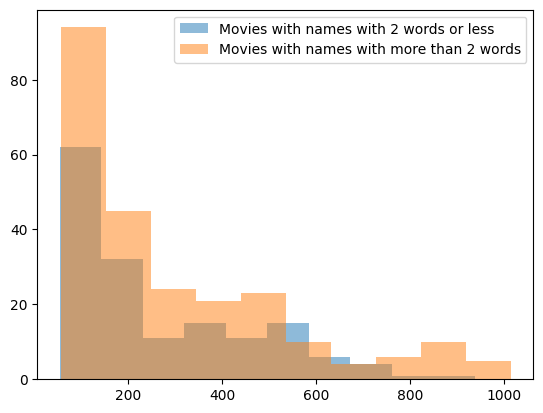

In [ ]:
plt.hist(group1, label ='Movies with names with 2 words or less', alpha = 0.5)
plt.hist(group2, label ='Movies with names with more than 2 words',alpha = 0.5)
plt.legend(loc='upper right')